# Ames Housing Sale Price Analysis

Mark Prettyman

## Executive Summary

This analysis presented by Mark Prettyman outlines statistical information from data about all home sales in Ames, Iowa between 2006 and 2010. The data used is from the Ames Housing dataset, which contains records about each home sale between 2006 and 2010. Characteristics per home sale may be as broad as sale price, or as specific as the value of a miscellaneous feature if it is present within a property.

The analysis was able to draw some conclusions, namely, the range of the sale price where the majority of home sales exist, as well as engineering a new feature to display the Age of each home at time of sale, and finding a negative correlation between advancing age and sale price, despite a few outliers.

Among the other descriptive stastistics displayed include the mean sale price per neighborhood, and a visualization the overall condition of all homes sold by neighborhood.

This analysis should be useful in ones overall analysis of the Ames Housing market for the selected time period.

## The Data

This data set is a DataFrame containing information about the real estate market for homes in Ames, Iowa for the period of time between 2006 and 2010. The DataFrame contains information about each home sale, the time and price at which it was sold, and the general characteristics of each property, such as the slope, the number of rooms above grade, and the overall condition of the property as graded by a rubric.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

file_path = "https://github.com/learn-co-curriculum/da-phase1-project-enterprise/raw/main/data/ames.csv"
df = pd.read_csv(file_path, index_col=0)

In [2]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:


df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<AxesSubplot:>

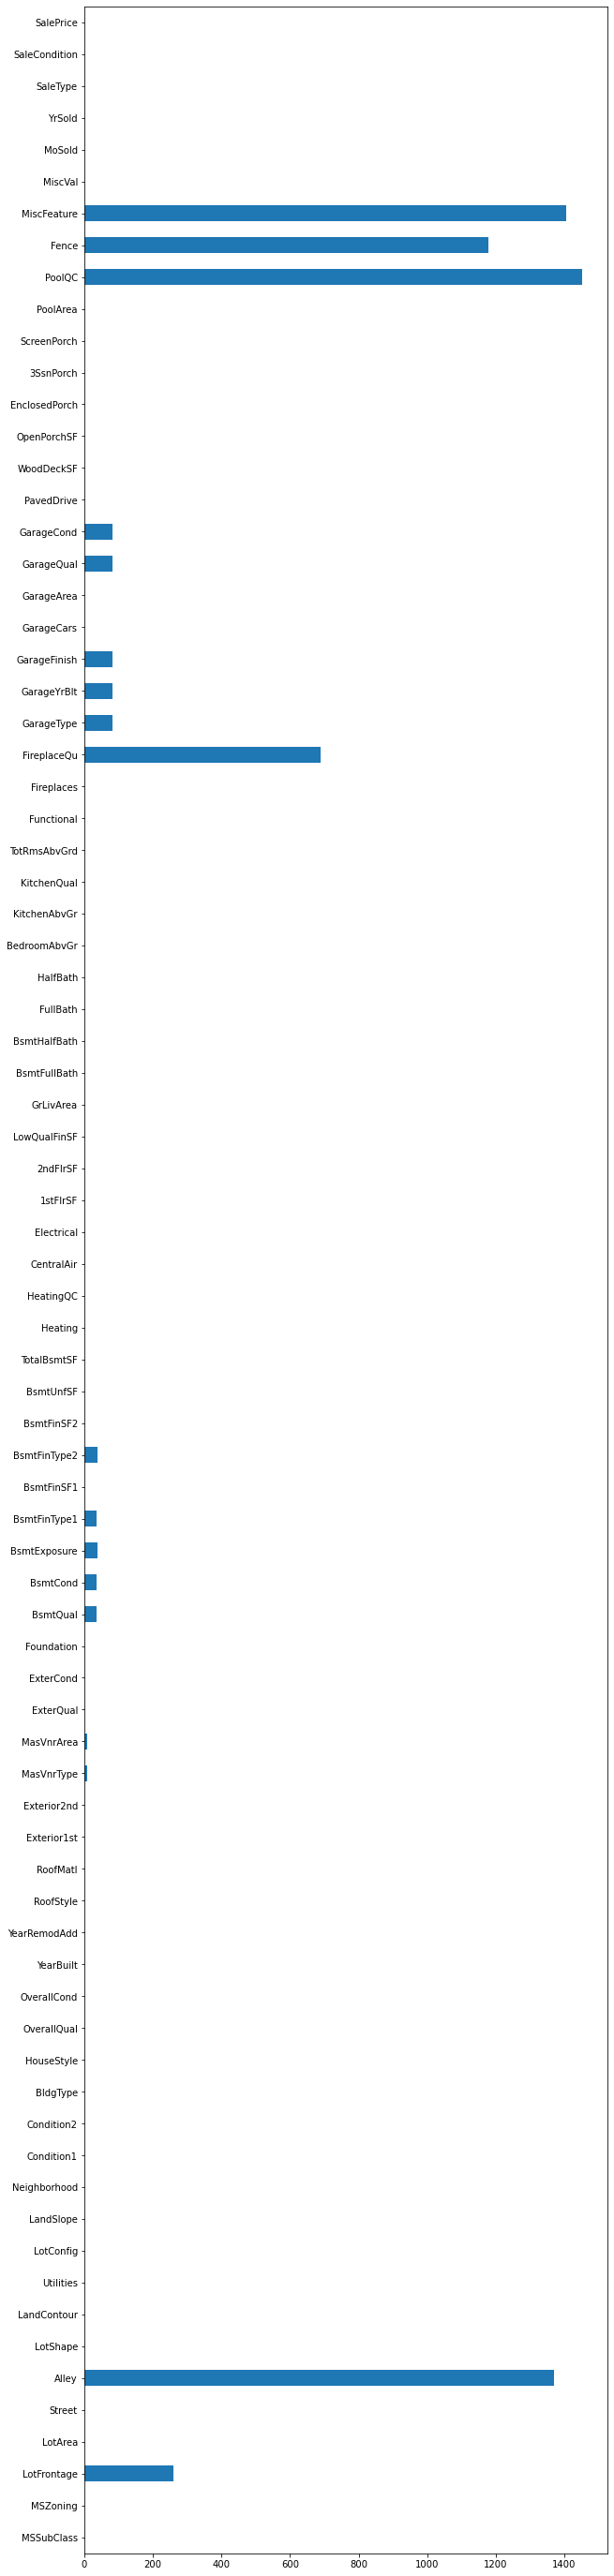

In [5]:
df.isna().sum().plot(kind='barh', figsize=(10,50))

In [6]:
df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [7]:
df['YearBuilt'].min()

1872

In [8]:
column_names = df.columns

In [9]:
missing_values = df.columns[df.isna().any()]
missing_values

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [10]:
print('There are 1460 rows in this data set.')
print('The columns for this data set are:', column_names)
print('These columns have missing values:', missing_values)

There are 1460 rows in this data set.
The columns for this data set are: Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'Garage

## Distribution of `SalePrice`

In [11]:
x = df['SalePrice']
x

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

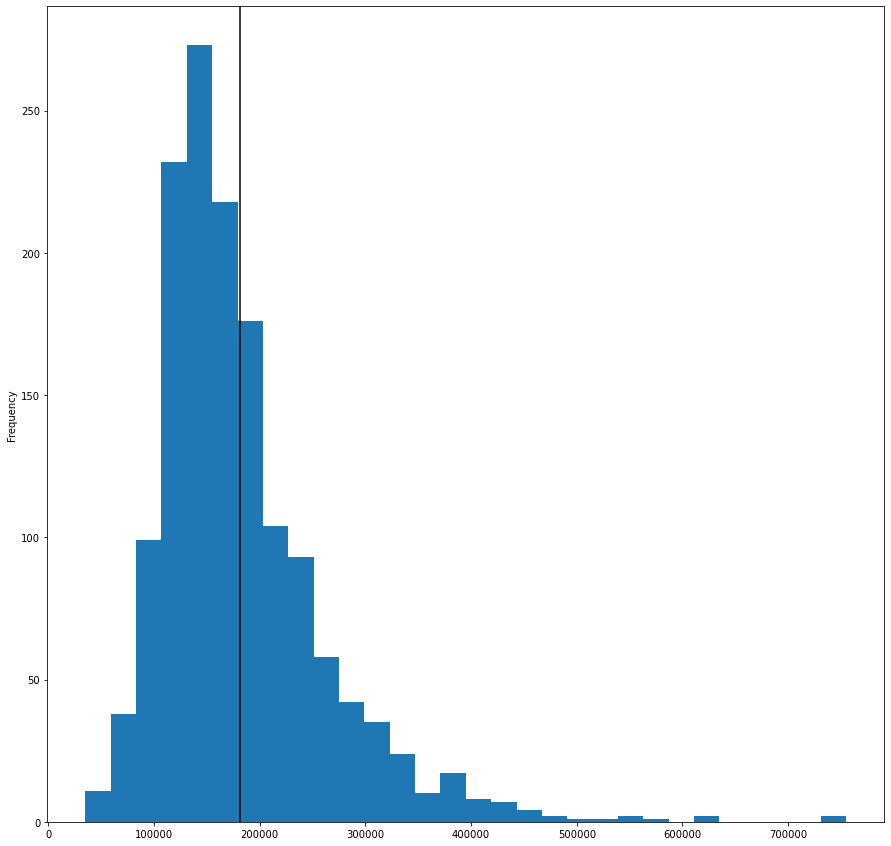

In [12]:
df['SalePrice'].plot.hist(bins=30, figsize=(15,15))



plt.axvline(x.mean(), color='black')



Most of the homes in this dataset were sold between the $100K and $200K price point, as the mean displayed supports this inference. The dataset for prices tails off towards the higher range, and there is an outlier at around $730K.

## Differences between Subsets

I am splitting the data to organize the sales by the condition it was sold in, and every type of sale for each condition the house was sold in. The 'SalePrice' column represents the sum of the prices of all the houses sold under that 'OverallCond' by 'SaleType'.

The Pivot Table dives deeper into this categorization and returns the sum of all the houses sold under each condition within each neighborhood.

In [13]:
group = df.groupby(by=['OverallCond', 'SaleType'])
group


In [14]:
pivot = pd.pivot_table(df, values='SalePrice', index=['OverallCond', 'SaleType'],
                      columns='Neighborhood', aggfunc=sum, dropna=True)
pivot

Neighborhood            Blmngtn   Blueste    BrDale    BrkSide    ClearCr  \
OverallCond SaleType                                                        
1           WD              NaN       NaN       NaN        NaN        NaN   
2           ConLD           NaN       NaN       NaN        NaN        NaN   
            New             NaN       NaN       NaN        NaN        NaN   
            WD              NaN       NaN       NaN    76500.0        NaN   
3           COD             NaN       NaN       NaN        NaN        NaN   
            ConLw           NaN       NaN       NaN    60000.0        NaN   
            Oth             NaN       NaN       NaN        NaN        NaN   
            WD              NaN       NaN   89500.0    39300.0        NaN   
4           COD             NaN       NaN       NaN        NaN        NaN   
            ConLD           NaN       NaN       NaN        NaN        NaN   
            WD              NaN       NaN       NaN   225000.0   489432.0   
5           COD             NaN       NaN  197400.0        NaN   190000.0   
            CWD             NaN       NaN       NaN        NaN        NaN   
            Con             NaN       NaN       NaN        NaN        NaN   
            ConLD           NaN       NaN       NaN        NaN        NaN   
            ConLI           NaN       NaN       NaN        NaN        NaN   
            ConLw           NaN       NaN       NaN        NaN        NaN   
            New       1045080.0       NaN       NaN        NaN        NaN   
            Oth             NaN       NaN       NaN        NaN        NaN   
            WD        2267725.0       NaN  798500.0  1147600.0  2832500.0   
6           COD             NaN  151000.0       NaN        NaN        NaN   
            CWD             NaN       NaN       NaN        NaN        NaN   
            ConLw           NaN       NaN       NaN        NaN        NaN   
            New             NaN       NaN       NaN        NaN        NaN   
            WD              NaN  124000.0  231000.0  2460500.0   716500.0   
7           COD             NaN       NaN       NaN        NaN   244400.0   
            CWD             NaN       NaN       NaN        NaN        NaN   
            ConLD           NaN       NaN       NaN        NaN        NaN   
            WD              NaN       NaN  237500.0  2287575.0   908500.0   
8           ConLI           NaN       NaN       NaN        NaN        NaN   
            WD              NaN       NaN  118000.0   809000.0   570500.0   
9           COD             NaN       NaN       NaN        NaN        NaN   
            WD              NaN       NaN       NaN   134900.0        NaN   

Neighborhood             CollgCr    Crawfor    Edwards     Gilbert     IDOTRR  \
OverallCond SaleType                                                            
1           WD               NaN        NaN    61000.0         NaN        NaN   
2           ConLD            NaN        NaN        NaN         NaN    85000.0   
            New              NaN        NaN        NaN         NaN        NaN   
            WD               NaN        NaN        NaN         NaN    67000.0   
3           COD              NaN        NaN   172000.0         NaN        NaN   
            ConLw            NaN        NaN        NaN         NaN        NaN   
            Oth              NaN        NaN   150000.0         NaN        NaN   
            WD               NaN   200624.0   562000.0         NaN    35311.0   
4           COD              NaN        NaN        NaN         NaN    68400.0   
            ConLD            NaN        NaN        NaN         NaN    81000.0   
            WD               NaN        NaN   728800.0         NaN   355500.0   
5           COD              NaN   217000.0   312500.0         NaN        NaN   
            CWD              NaN        NaN        NaN         NaN        NaN   
            Con              NaN        NaN        NaN         NaN        NaN   
        

<AxesSubplot:title={'center':'Homes sold by Condition'}, xlabel='Overall Condition', ylabel='Sale Price'>

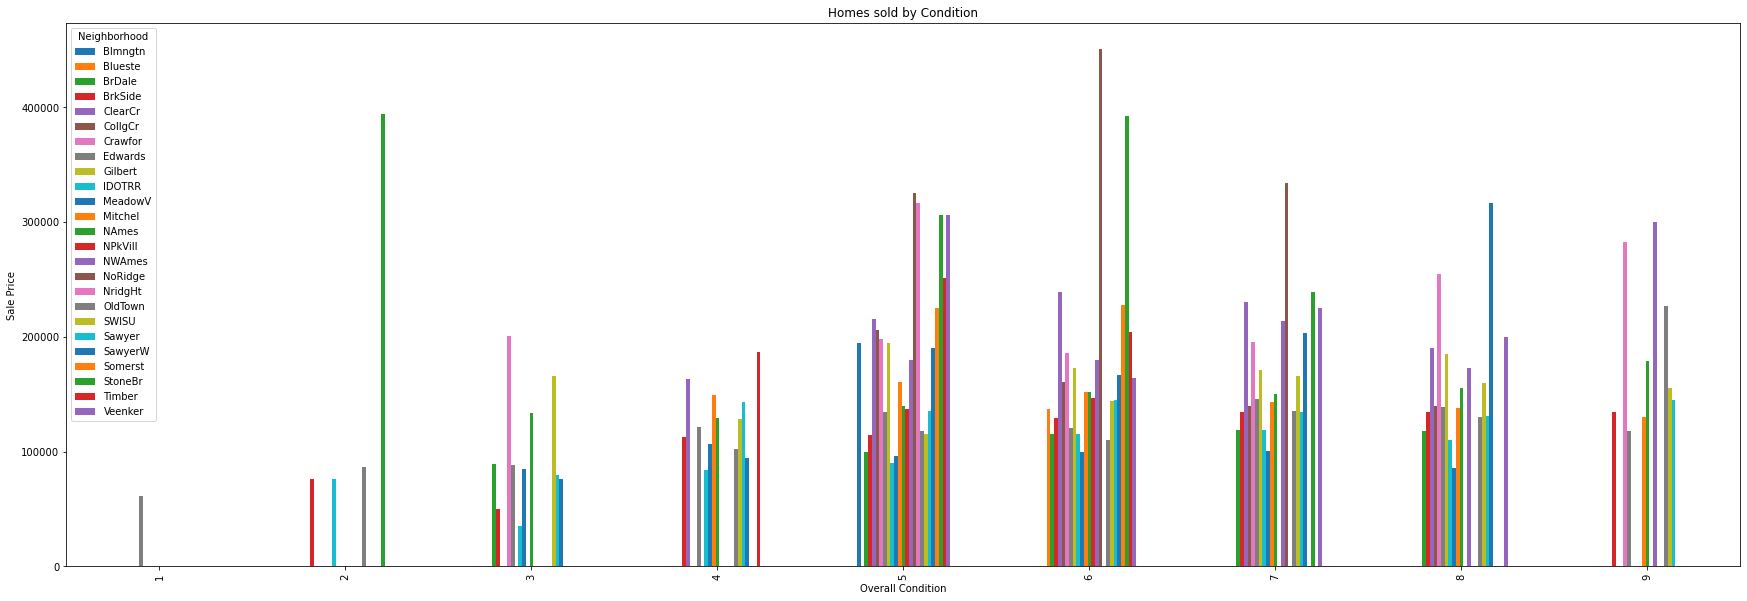

In [15]:
pd.pivot_table(df, index='OverallCond', columns='Neighborhood', values='SalePrice').plot.bar(
    figsize=(30,10), xlabel='Overall Condition', ylabel='Sale Price', title='Homes sold by Condition')

A user can get a general idea of the frequency of home sales sorted in each condition when it was sold, with a further breakdown of home pricing per neighborhood.

## Correlation between `Neighborhood` and `SalePrice`



In [16]:
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [17]:
df['SalePrice'].tail()

Id
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, dtype: int64

In [18]:
df_correlation = df.groupby('Neighborhood')['SalePrice'].mean()
print('This is a Series object that returns the mean sale price of homes by', df_correlation)



This is a Series object that returns the mean sale price of homes by Neighborhood
Blmngtn    194870.882353
Blueste    137500.000000
BrDale     104493.750000
BrkSide    124834.051724
ClearCr    212565.428571
CollgCr    197965.773333
Crawfor    210624.725490
Edwards    128219.700000
Gilbert    192854.506329
IDOTRR     100123.783784
MeadowV     98576.470588
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
NWAmes     189050.068493
NoRidge    335295.317073
NridgHt    316270.623377
OldTown    128225.300885
SWISU      142591.360000
Sawyer     136793.135135
SawyerW    186555.796610
Somerst    225379.837209
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Name: SalePrice, dtype: float64


<AxesSubplot:title={'center':'Average Home Sale Price by Neighborhood'}, xlabel='Neighborhood', ylabel='Average Sale Price'>

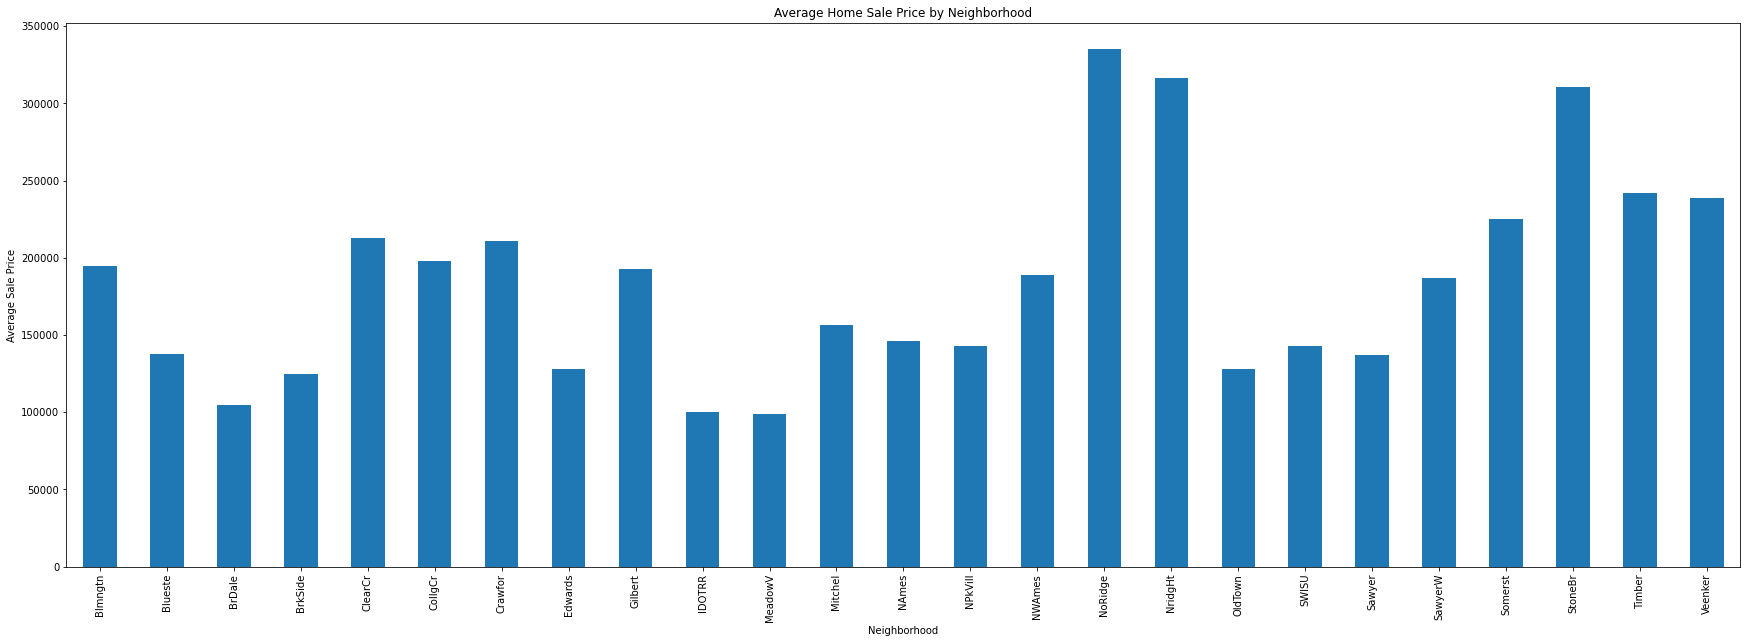

In [19]:
df_correlation.plot(kind='bar', figsize=(30,10), ylabel='Average Sale Price', title='Average Home Sale Price by Neighborhood')


From this Series one can observe the mean sale price per neighborhood and use that information to assess any potentially lucrative markets to invest in real estate, or simply judge a neighborhood whose homes on sale tend to fall around the preffered price range one would want to buy their home; this data assists with making that judgement by selecting to view houses in neighborhoods where the mean is at or around what they are willing to pay.

## Engineered Feature: ['Age']



In [20]:
df['Age'] = df['YearBuilt'] - df['YrSold']


In [25]:
df['Age'] = df['Age'].abs()

In [26]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [28]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

<AxesSubplot:title={'center':'Average Sale Price for Age of Home at Time of Sale'}, xlabel='Age', ylabel='Average Sale Price'>

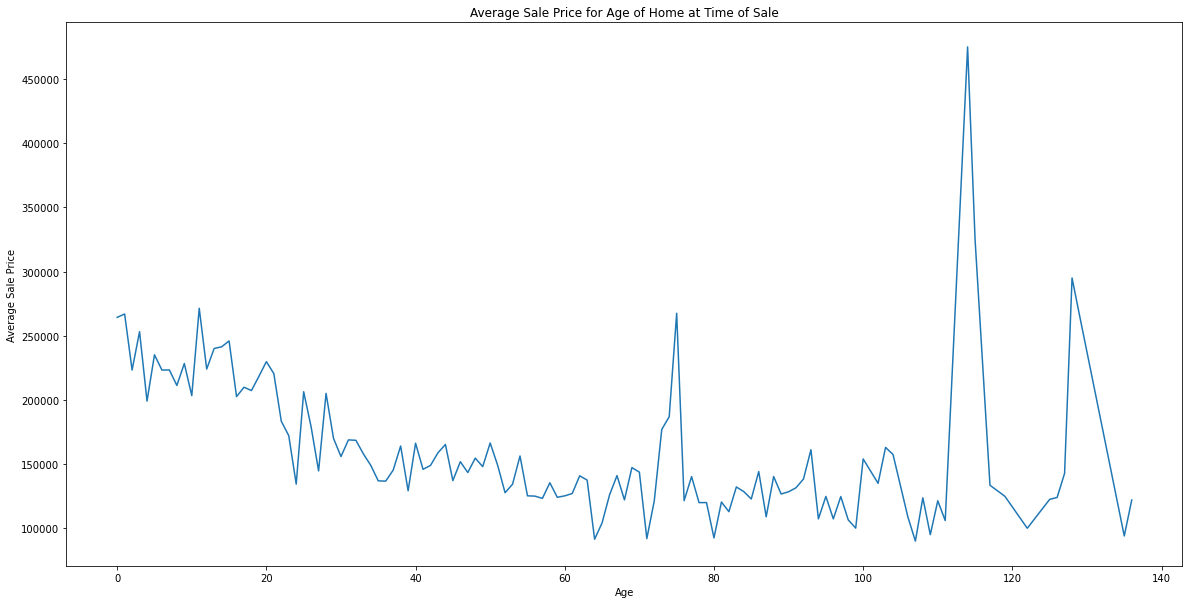

In [37]:
df.groupby('Age')['SalePrice'].mean().plot(kind='line', figsize=(20,10), ylabel="Average Sale Price", title='Average Sale Price for Age of Home at Time of Sale')

In [ ]:
# empty

In [ ]:
# empty

I grouped the Age and the mean value of the Sale Price to explore the relationship between the age of a home and the sale price at the time of sale. It seems that as homes age there is a negative correlation between advancing time and sale price, with the exception of outlier values we encountered earlier that skew the tail.